## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import time

# reading data
movie_industry = pd.read_csv('movies.csv')

### Data quality check
*By Lilly Sorkin*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [2]:
# getting numeric/continuous predictors
continuous = []
for col in movie_industry.columns:
    if movie_industry.dtypes[col] != object:
        continuous.append(col)
continuous.remove('gross')
continuous        

['year', 'score', 'votes', 'budget', 'runtime']

Text(0, 0.5, 'Count')

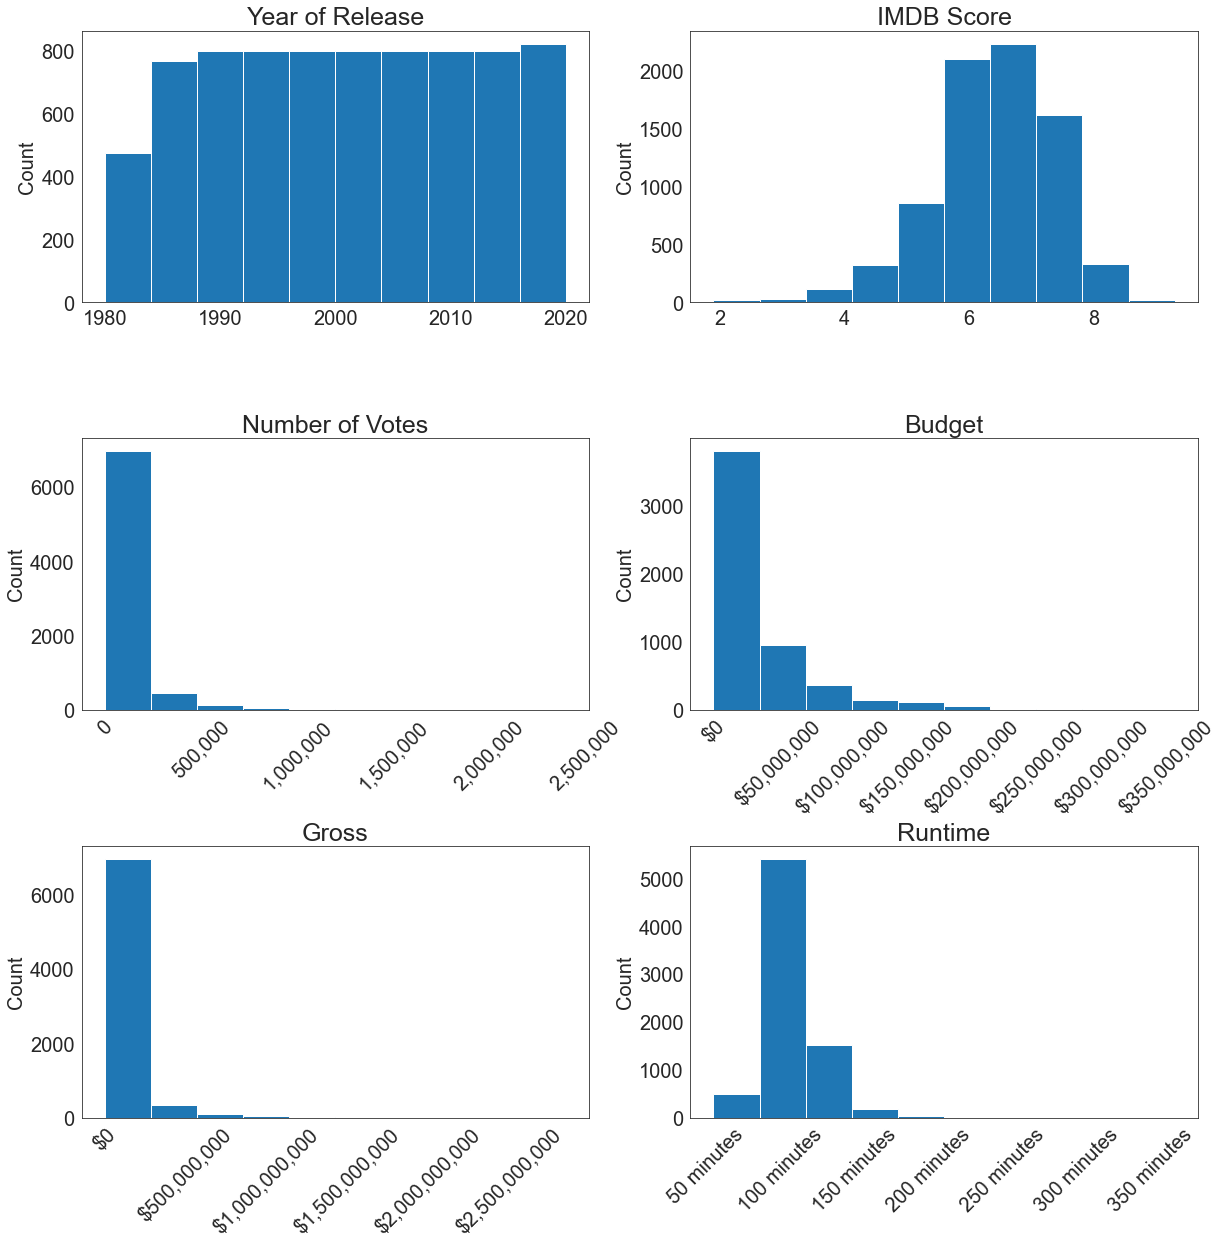

In [3]:
#plotting numeric predictors against count to show distribution
sns.set_style('white')
fig, axes = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

axes[0,0].hist(movie_industry.year)
axes[0,0].set_title('Year of Release', fontsize=25)
axes[0,0].tick_params(axis = 'both',labelsize=20)
axes[0,0].set_ylabel('Count', fontsize=20)

axes[0,1].hist(movie_industry.score)
axes[0,1].set_title('IMDB Score', fontsize=25)
axes[0,1].tick_params(axis = 'both',labelsize=20)
axes[0,1].set_ylabel('Count', fontsize=20)

axes[1,0].hist(movie_industry.votes)
axes[1,0].set_title('Number of Votes', fontsize=25)
axes[1,0].tick_params(axis = 'both',labelsize=20)
axes[1,0].xaxis.set_major_formatter('{x:,.0f}')
axes[1,0].tick_params(axis='x', labelrotation=45)
axes[1,0].set_ylabel('Count', fontsize=20)

axes[1,1].hist(movie_industry.budget)
axes[1,1].set_title('Budget', fontsize=25)
axes[1,1].tick_params(axis = 'both',labelsize=20)
axes[1,1].xaxis.set_major_formatter('${x:,.0f}')
axes[1,1].tick_params(axis='x', labelrotation=45)
axes[1,1].set_ylabel('Count', fontsize=20)

axes[2,0].hist(movie_industry.gross)
axes[2,0].set_title('Gross', fontsize=25)
axes[2,0].tick_params(axis = 'both',labelsize=20)
axes[2,0].xaxis.set_major_formatter('${x:,.0f}')
axes[2,0].tick_params(axis='x', labelrotation=45)
axes[2,0].set_ylabel('Count', fontsize=20)


axes[2,1].hist(movie_industry.runtime)
axes[2,1].set_title('Runtime', fontsize=25)
axes[2,1].tick_params(axis = 'both',labelsize=20)
axes[2,1].xaxis.set_major_formatter('{x:.0f} minutes')
axes[2,1].tick_params(axis='x', labelrotation=45)
axes[2,1].set_ylabel('Count', fontsize=20)

In [4]:
#getting categoric variables that have a reasonable number of different values
categorical = []
for col in movie_industry.columns:
    if movie_industry.dtypes[col] == object:
        categorical.append(col)
categorical.remove('name')
categorical.remove('director')
categorical.remove('released')
categorical.remove('star')
categorical        

['rating', 'genre', 'writer', 'country', 'company']

In [5]:
#dropping rows with null values for data quality check
movie_industry_clean = movie_industry.dropna()
movie_industry_clean.reset_index(inplace=True)

In [6]:
#reducing number of values being plotted so that it's readable
companies = pd.DataFrame(columns=['Company', 'Count'])
companies['Company'] = movie_industry_clean.company.unique()
companies['Count'] = list(movie_industry_clean.company.value_counts(sort=False))
repeated_companies = companies.loc[companies.Count>20]

In [7]:
#reducing number of values being plotted so that it's readable
countries = pd.DataFrame(columns=['Country', 'Count'])
countries['Country'] = movie_industry_clean.country.unique()
countries['Count'] = list(movie_industry_clean.country.value_counts(sort=False))
repeated_countries = countries.loc[countries.Count>3]

Text(0, 0.5, 'Count')

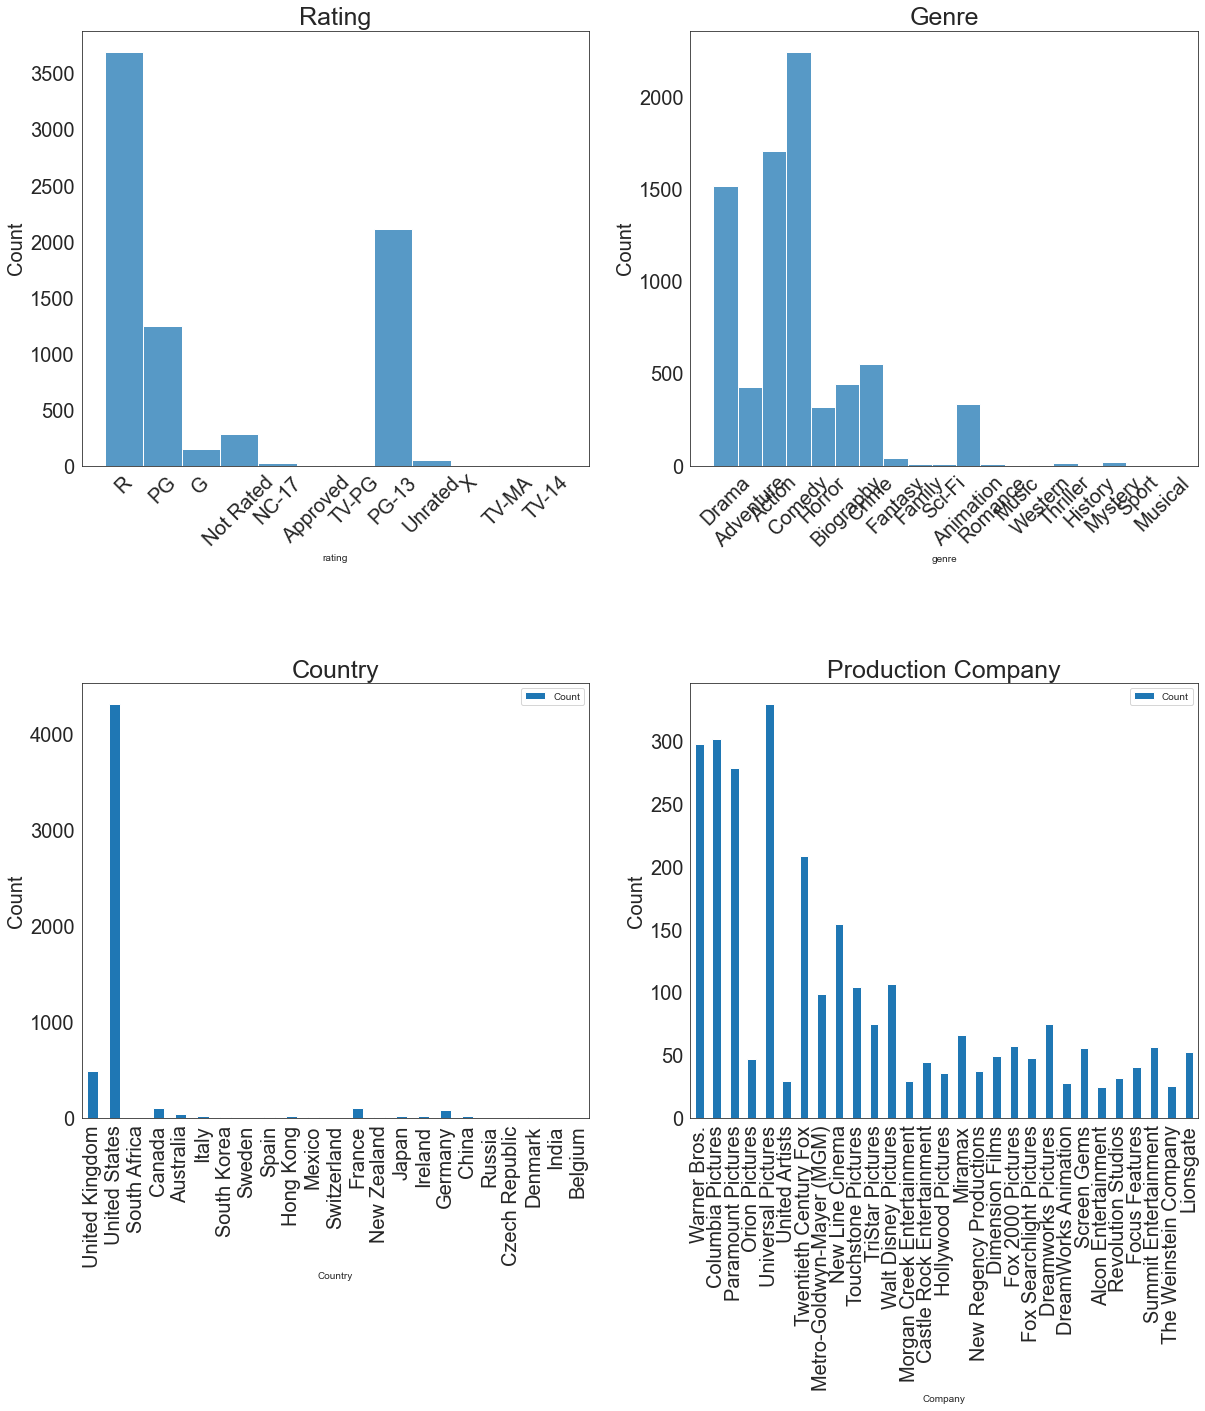

In [8]:
#plotting categoric predictors against count to see distribution
sns.set_style('white')
fig, axes = plt.subplots(2,2,figsize=(20,20))
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.5)

sns.histplot(ax=axes[0,0],x='rating', data = movie_industry)
axes[0,0].set_title('Rating', fontsize=25)
axes[0,0].tick_params(axis = 'both',labelsize=20)
axes[0,0].tick_params(axis='x', labelrotation=45)
axes[0,0].set_ylabel('Count', fontsize=20)

sns.histplot(ax=axes[0,1], x='genre', data = movie_industry)
axes[0,1].set_title('Genre', fontsize=25)
axes[0,1].tick_params(axis = 'both',labelsize=20)
axes[0,1].tick_params(axis='x', labelrotation=45)
axes[0,1].set_ylabel('Count', fontsize=20)

repeated_countries.plot.bar(ax=axes[1,0], x='Country', y='Count')
axes[1,0].set_title('Country', fontsize=25)
axes[1,0].tick_params(axis = 'both',labelsize=20)
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,0].set_ylabel('Count', fontsize=20)

repeated_companies.plot.bar(ax=axes[1,1], x='Company', y='Count')
axes[1,1].set_title('Production Company', fontsize=25)
axes[1,1].tick_params(axis = 'both',labelsize=20)
axes[1,1].tick_params(axis='x', labelrotation=90)
axes[1,1].set_ylabel('Count', fontsize=20)

In [9]:
predictors = list(movie_industry.columns)
predictors.remove('gross')
predictors.remove('name')

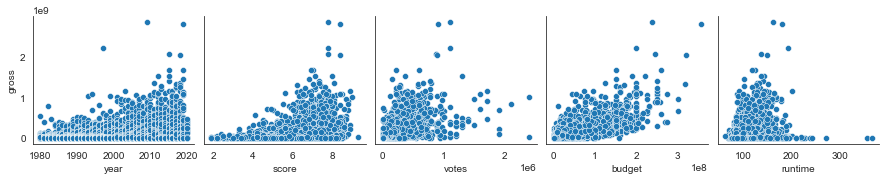

In [10]:
#...Association of the response with the predictors...#
sns.pairplot(movie_industry, y_vars=['gross'], x_vars=continuous)

In [15]:
#...Association of the response with the predictors...#
sns.pairplot(movie_industry, y_vars=['gross'], x_vars=categorical)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Data cleaning
*By Lilly Sorkin*

From the data quality check we realized that:
1. After spending several hours working on it, we discovered that our initial dataset was too dificult to clean. It contained a multitude of listed dictionaries that we were unable to extract information from. As such we turned to our da

2. Some of the columns that we were expecting to be highly important were missing values. For example `budget` was missing 2171 values. Since imputing these values would not provide helpful information for our model, we removed all rows with missing values, leaving us with 5421 data points for our model development.

The code below implements the above cleaning.

In [ ]:
movie_industry = pd.read_csv('movies.csv')

In [ ]:
#checking for null values
movie_industry.isnull().sum()

In [13]:
#dropping rows with null values
movie_industry_clean = movie_industry.dropna()
movie_industry_clean.reset_index(inplace=True)

In [14]:
movie_industry_clean.describe()

,index,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,4069.060505,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,2097.297246,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,0.000000,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,2389.000000,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,4187.000000,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,5844.000000,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,7652.000000,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


### Data preparation
*By Lilly Sorkin and Aarti Pappu*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict gross, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. These variables were `month`, `continent`, `decade`.


In [16]:
# data wrangling
def wrangling(df):
    df = df.drop('index', axis=1)
    df.replace(' ', '_', regex=True, inplace = True)
    df.replace('-', '_', regex=True, inplace = True)
    return df

movies = wrangling(movie_industry_clean)

In [17]:
# creating a month variable for each value
def month(s):
    month = s.released.partition("_")[0]
    if month in ['June', 'July', 'May', 'December', 'October', 'September','February', 'April', 'August', 'March', 'November', 'January']:
        return month
    else:
        return 'NA'

movies['month'] = movies.apply(month, axis=1)

# dropping the values in which 'month' = NA
movies.drop(movies.loc[movies['month'] == 'NA'].index, inplace=True)

In [18]:
# grouping countries into continents
def continent(s):
    if s['country'] in ['United_States','Mexico', 'Canada','Jamaica']:
        return 'North_America'
    if s['country'] in ['United_Kingdom', 'France', 'Germany', 'Belgium','Spain', 'Norway', 'Iceland', 'West_Germany', 'Ireland', 'Italy', 'Finland', 'Czech_Republic', 'Switzerland', 'Sweden', 'Denmark', 'Netherlands','Federal_Republic_of_Yugoslavia','Yugoslavia', 'Hungary', 'Republic_of_Macedonia', 'Austria','Portugal','Malta']:
        return 'Europe'
    if s['country'] in ['Japan','China','South_Korea', 'Hong_Kong','India','United_Arab_Emirates','Taiwan','Lebanon','Indonesia', 'Iran','Israel','Russia','Thailand']:
        return 'Asia'
    if s['country'] in ['Australia','New_Zealand']:
        return 'Oceania'
    if s['country'] in ['South_Africa', 'Kenya']:
        return 'Africa'
    if s['country'] in ['Brazil', 'Argentina', 'Aruba', 'Chile', 'Panama','Colombia']:
        return 'South_America'
    else:
        return 'NA'

movies['continent'] = movies.apply(continent, axis=1)

In [19]:
# dropping columns that will not be used in the regression
movies.drop(['name','released','director','writer','country','star','company'], axis=1, inplace=True)

In [20]:
# split into training & test
np.random.seed(2)
train = movies.sample(round(movies.shape[0]*0.8)) # 80%
test = movies.drop(train.index)

# Resetting the indices for both test and train
train = train.reset_index()
train = train.drop(['index'], axis=1)
test = test.reset_index()
test = test.drop(['index'], axis=1)

In [ ]:
# converting the test and train data to .csv files - commented out so it does not run again

#train.to_csv('train.csv')
#test.to_csv('test.csv')

## Exploratory data analysis
*By Isabel Knight*

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [21]:
# base model - no interactions/transformations
ols_object = smf.ols(formula = 'gross~budget+genre+rating+votes+continent+runtime+month+score+year', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     192.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:13:35   Log-Likelihood:                -86374.
No. Observations:                4333   AIC:                         1.728e+05
Df Residuals:                    4288   BIC:                         1.731e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -4.404e+08   3.82e+08     -1.154      0.249   -1.19e+09    3.08e+08
genre[T.Adventure]          6.658e+06   8.06e+06      0.826      0.409   -9.14e+06    2.25e+07
genre[T.Animation]          5.492e+07   1.06e+07      5.189      0.000    3.42e+07    7.57e+07
genre[T.Biography]         -6.668e+06   8.41e+06     -0.793      0.428   -2.32e+07    9.82e+06
genre[T.Comedy]              1.13e+07   4.99e+06      2.264      0.024    1.52e+06    2.11e+07
genre[T.Crime]             -2.728e+06   7.38e+06     -0.369      0.712   -1.72e+07    1.17e+07
genre[T.Drama]              9.542e+05    5.8e+06      0.165      0.869   -1.04e+07    1.23e+07
genre[T.Family]             3.575e+08   5.57e+07      6.421      0.000    2.48e+08    4.67e+08
genre[T.Fantasy]            1.775e+07   1.94e+07      0.916      0.360   -2.02e+07    5.57e+07
genre[T.Horror]             4.206e+07    8.8e+06      4.779      0.000    2.48e+07    5.93e+07
genre[T.Mystery]           -2.179e+07   2.99e+07     -0.730      0.466   -8.03e+07    3.68e+07
genre[T.Romance]            -2.32e+05   6.41e+07     -0.004      0.997   -1.26e+08    1.25e+08
genre[T.Sci_Fi]            -2.052e+07   4.96e+07     -0.413      0.679   -1.18e+08    7.68e+07
genre[T.Thriller]           4.868e+07   4.54e+07      1.073      0.283   -4.02e+07    1.38e+08
genre[T.Western]            2.236e+07   7.84e+07      0.285      0.775   -1.31e+08    1.76e+08
rating[T.G]                -7.427e+07   1.12e+08     -0.664      0.507   -2.94e+08    1.45e+08
rating[T.NC_17]             -5.36e+07   1.17e+08     -0.460      0.646   -2.82e+08    1.75e+08
rating[T.Not_Rated]        -4.043e+07   1.13e+08     -0.357      0.721   -2.63e+08    1.82e+08
rating[T.PG]               -4.353e+07   1.11e+08     -0.392      0.695   -2.61e+08    1.74e+08
rating[T.PG_13]            -5.248e+07   1.11e+08     -0.472      0.637    -2.7e+08    1.66e+08
rating[T.R]                -6.886e+07   1.11e+08     -0.619      0.536   -2.87e+08    1.49e+08
rating[T.TV_MA]            -5.868e+07   1.57e+08     -0.374      0.709   -3.67e+08    2.49e+08
rating[T.Unrated]            -5.7e+07   1.15e+08     -0.497      0.619   -2.82e+08    1.68e+08
rating[T.X]                -1.045e+08   1.57e+08     -0.665      0.506   -4.13e+08    2.04e+08
continent[T.Asia]           2.671e+07    6.5e+07      0.411      0.681   -1.01e+08    1.54e+08
continent[T.Europe]         6.996e+06   6.41e+07      0.109      0.913   -1.19e+08    1.33e+08
continent[T.North_America]   2.04e+07    6.4e+07      0.319      0.750   -1.05e+08    1.46e+08
continent[T.Oceania]        9.305e+06   6.58e+07      0.142      0.887    -1.2e+08    1.38e+08
continent[T.South_America]  2.389e+07    7.5e+07      0.319      0.750   -1.23e+08    1.71e+08
month[T.August]            -1.051e+07   8.1

Text(0, 0.5, 'Residuals')

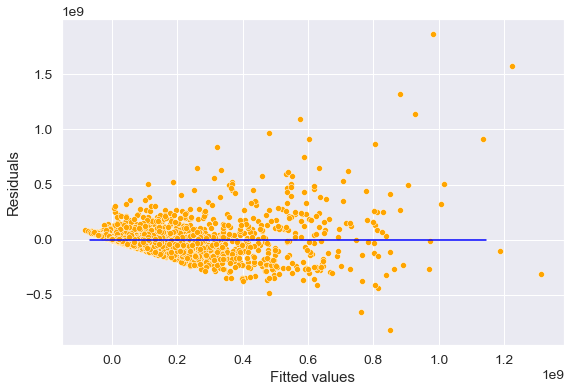

In [22]:
# residuals vs fitted values for the base model
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

## Developing the model
*By Aarti Pappu*

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [23]:
# doing VIF to see if there is multicollinearity among the variables - there is not!
X = train[['year', 'votes', 'score', 'runtime', 'budget']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

   feature           VIF
0    const  40962.023000
1     year      1.129782
2    votes      1.655555
3    score      1.511912
4  runtime      1.356838
5   budget      1.496755


In [24]:
# using the base model to identify and remove influential points

#Computing the leverage statistic for each observation 
influence = model.get_influence()
leverage = influence.hat_matrix_diag

out = model.outlier_test()

#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
average_leverage

#We will remove all observations that have leverage higher than the threshold value.
high_leverage_threshold = 4*average_leverage

#Number of high leverage points in the dataset
print(np.sum(leverage>high_leverage_threshold))

#Dropping influential points from data
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0], (np.where(leverage>high_leverage_threshold)[0])))

train_filtered.shape

#Number of points removed as they were influential
print(train.shape[0]-train_filtered.shape[0])

/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


104
6


/Users/aarti.pappu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


In [40]:
# converting the train_filtered to .csv files for report - commented out so it does not run again

#train_filtered.to_csv('train_filtered.csv')

The following code chunks prepare the data for backwards selection, and then implement backwards selection for the variable (not considering interaction terms).

In [29]:
# Creating dummy variables for the categorical variables to do forward selection 
def dummies_for_categorical_variables(df):
    rating_dummy = pd.get_dummies(df['rating'])
    df = pd.concat([df, rating_dummy], axis=1)
    df = df.drop('rating', axis=1)
    genre_dummy = pd.get_dummies(df['genre'])
    df = pd.concat([df, genre_dummy], axis=1)
    df = df.drop('genre', axis=1)
    continent_dummy = pd.get_dummies(df['continent'])
    df = pd.concat([df, continent_dummy], axis=1)
    df = df.drop('continent', axis=1)
    month_dummy = pd.get_dummies(df['month'])
    df = pd.concat([df, month_dummy], axis=1)
    df = df.drop('month', axis=1)
    return df

train_variable_selection = dummies_for_categorical_variables(train_filtered)

In [30]:
# Creating a set of predictors from which we need to find the best subset of predictors
X = train_variable_selection[['year', 'score', 'votes', 'budget', 'runtime', 'Approved', 'G',
       'NC_17', 'Not_Rated', 'PG', 'PG_13', 'R', 'TV_MA', 'Unrated', 'X',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci_Fi',
       'Thriller', 'Western', 'Africa', 'Asia', 'Europe', 'North_America',
       'Oceania', 'South_America', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September']]

In [27]:
# Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('gross~' + '+'.join(predictor_subset),data = train_variable_selection).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [28]:
# Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [97]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [98]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [99]:
def backward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"], index = range(1,len(X.columns)))

    tic = time.time()
    predictors = X.columns
    models_best.loc[len(predictors)] = processSubset(predictors)
    
    while(len(predictors) > 1):  
        models_best.loc[len(predictors)-1] = backward(predictors)
        predictors = models_best.loc[len(predictors)-1]["model"].params.index[1:]

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [100]:
models_best = backward_selection()

Processed  48 models on 47 predictors in 6.1365649700164795 seconds.
Processed  47 models on 46 predictors in 4.715174913406372 seconds.
Processed  46 models on 45 predictors in 4.802551031112671 seconds.
Processed  45 models on 44 predictors in 5.259042024612427 seconds.
Processed  44 models on 43 predictors in 4.195645809173584 seconds.
Processed  43 models on 42 predictors in 4.735522985458374 seconds.
Processed  42 models on 41 predictors in 3.8705837726593018 seconds.
Processed  41 models on 40 predictors in 3.7699949741363525 seconds.
Processed  40 models on 39 predictors in 3.545290946960449 seconds.
Processed  39 models on 38 predictors in 3.3510489463806152 seconds.
Processed  38 models on 37 predictors in 2.4610018730163574 seconds.
Processed  37 models on 36 predictors in 2.2622017860412598 seconds.
Processed  36 models on 35 predictors in 2.3428380489349365 seconds.
Processed  35 models on 34 predictors in 2.435727119445801 seconds.
Processed  34 models on 33 predictors in 

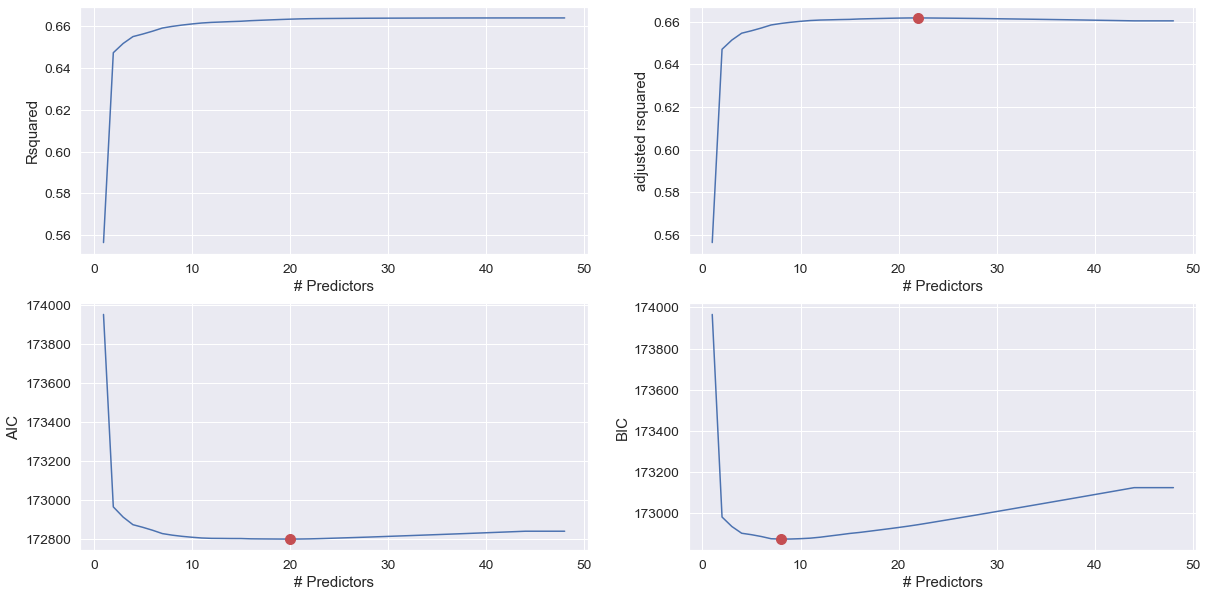

In [101]:
best_sub_plots()

In [105]:
best_bwd_reg_model = models_best['model'][8]
best_bwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     934.2
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:47:16   Log-Likelihood:                -86396.
No. Observations:                4333   AIC:                         1.728e+05
Df Residuals:                    4323   BIC:                         1.729e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.213e+07    2.9e+06    -14.540      0.000   -4.78e+07   -3.65e+07
votes        365.8360     10.477     34.917      0.000     345.295     386.377
budget         2.5641      0.049     52.303      0.000       2.468       2.660
PG          2.653e+07   4.99e+06      5.311      0.000    1.67e+07    3.63e+07
PG_13       1.722e+07   4.01e+06      4.295      0.000    9.36e+06    2.51e+07
Animation   5.541e+07   8.32e+06      6.661      0.000    3.91e+07    7.17e+07
Family      3.508e+08   5.54e+07      6.331      0.000    2.42e+08    4.59e+08
Horror      3.495e+07   8.06e+06      4.334      0.000    1.91e+07    5.08e+07
Europe     -1.359e+07   4.79e+06     -2.836      0.005    -2.3e+07    -4.2e+06
October    -1.781e+07   5.67e+06     -3.138      0.002   -2.89e+07   -6.68e+06
==============================================================================
Omnibus:                     3879.397   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           425819.568
Skew:                           3.806   Prob(JB):                         0.00
Kurtosis:                      50.965   Cond. No.                     1.80e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We also wanted to consider interaction terms while performing backward variable selection. However, due to the vast number of categorical variables, we were not able to feasibly do variable selection with all of the variables. As a result, we decided to consider only the interaction terms between the number variables (`year`,`budget`, `votes`, `score`, and `runtime`)

In [88]:
#Creating a dataframe with all the predictors
X = train[['year', 'score', 'votes', 'budget','runtime']]
#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train[['year', 'score', 'votes', 'budget','runtime']]

In [89]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train_variable_selection['_'.join(combo)] = train_variable_selection[combo[0]]*train_variable_selection[combo[1]]
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]]
    X.loc[:,'_'.join(combo)] = train_variable_selection.loc[:,'_'.join(combo)] 

/var/folders/xt/lxvdtltj1hv8z26182tskp7m0000gp/T/ipykernel_67147/2505225237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train_variable_selection.loc[:,'_'.join(combo)]
/var/folders/xt/lxvdtltj1hv8z26182tskp7m0000gp/T/ipykernel_67147/2505225237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train_variable_selection.loc[:,'_'.join(combo)]
/var/folders/xt/lxvdtltj1hv8z26182tskp7m0000gp/T/ipykernel_67147/2505225237.py:6: SettingWithCopyWarning: 

In [90]:
models_best = backward_selection()

Processed  15 models on 14 predictors in 0.43499088287353516 seconds.
Processed  14 models on 13 predictors in 0.41268301010131836 seconds.
Processed  13 models on 12 predictors in 0.4389798641204834 seconds.
Processed  12 models on 11 predictors in 0.4133448600769043 seconds.
Processed  11 models on 10 predictors in 0.24467182159423828 seconds.
Processed  10 models on 9 predictors in 0.1831047534942627 seconds.
Processed  9 models on 8 predictors in 0.19032025337219238 seconds.
Processed  8 models on 7 predictors in 0.1336369514465332 seconds.
Processed  7 models on 6 predictors in 0.12300872802734375 seconds.
Processed  6 models on 5 predictors in 0.07169389724731445 seconds.
Processed  5 models on 4 predictors in 0.0546879768371582 seconds.
Processed  4 models on 3 predictors in 0.03626537322998047 seconds.
Processed  3 models on 2 predictors in 0.02438497543334961 seconds.
Processed  2 models on 1 predictors in 0.016173839569091797 seconds.
Total elapsed time: 2.877290964126587 sec

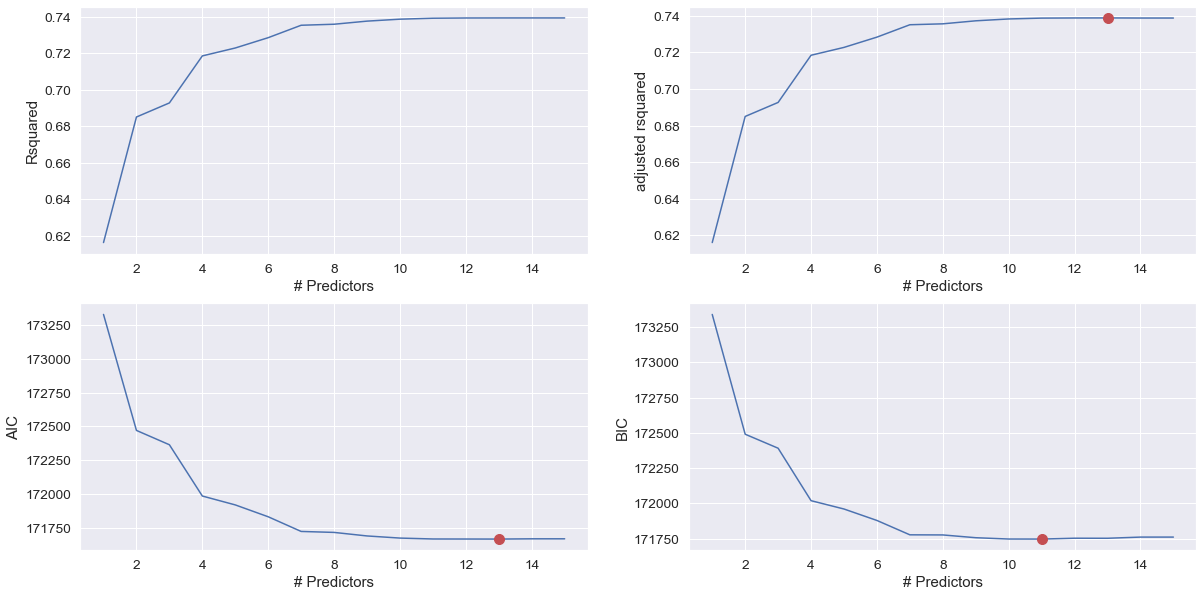

In [91]:
best_sub_plots()

In [92]:
best_bwd_reg_model_interactions = models_best['model'][13]
best_bwd_reg_model_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1022.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:43:35   Log-Likelihood:                -85822.
No. Observations:                4333   AIC:                         1.717e+05
Df Residuals:                    4320   BIC:                         1.718e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.062e+05   8.31e+04      6.088      0.000    3.43e+05    6.69e+05
votes           2.029e+04   2325.500      8.725      0.000    1.57e+04    2.48e+04
budget          -154.4319     10.382    -14.876      0.000    -174.785    -134.079
runtime         2.311e+07    3.8e+06      6.087      0.000    1.57e+07    3.05e+07
year_score      1747.1378   1063.220      1.643      0.100    -337.320    3831.595
year_votes        -8.9330      1.148     -7.784      0.000     -11.183      -6.683
year_budget        0.0755      0.005     14.557      0.000       0.065       0.086
year_runtime   -1.135e+04   1897.002     -5.985      0.000   -1.51e+04   -7634.824
score_votes     -307.4362     13.601    -22.604      0.000    -334.101    -280.771
score_budget       0.7311      0.055     13.296      0.000       0.623       0.839
score_runtime  -1.073e+05   2.51e+04     -4.270      0.000   -1.57e+05    -5.8e+04
votes_budget    2.287e-06   1.95e-07     11.741      0.000    1.91e-06    2.67e-06
votes_runtime      2.0955      0.485      4.325      0.000       1.146       3.045
budget_runtime    -0.0031      0.002     -1.579      0.114      -0.007       0.001
==============================================================================
Omnibus:                     3176.259   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195565.008
Skew:                           2.899   Prob(JB):                         0.00
Kurtosis:                      35.397   Cond. No.                     1.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# starting the development of a final model by creating a model from the signficant terms of the most recent model
# developed (model from backwards variable selection with interaction terms)

ols_object = smf.ols(formula = 'gross~votes+budget+runtime+year*votes+year*budget+year*runtime+score*votes+score*budget+score*runtime+votes*budget+votes*runtime', data = train_filtered)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1022.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:17:17   Log-Likelihood:                -85677.
No. Observations:                4327   AIC:                         1.714e+05
Df Residuals:                    4314   BIC:                         1.715e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.094e+05   3.89e+04      5.388      0.000    1.33e+05    2.86e+05
votes          1.972e+04   2301.852      8.567      0.000    1.52e+04    2.42e+04
budget         -148.8337     10.278    -14.481      0.000    -168.983    -128.684
runtime        2.227e+07   3.78e+06      5.887      0.000    1.49e+07    2.97e+07
year           1.632e+04   3.45e+04      0.473      0.636   -5.13e+04    8.39e+04
year:votes       -8.6433      1.137     -7.605      0.000     -10.872      -6.415
year:budget       0.0726      0.005     14.173      0.000       0.063       0.083
year:runtime  -1.111e+04   1897.544     -5.855      0.000   -1.48e+04   -7390.903
score          1.544e+05   1.05e+07      0.015      0.988   -2.03e+07    2.06e+07
score:votes    -301.7464     13.646    -22.112      0.000    -328.500    -274.993
score:budget      0.7058      0.055     12.935      0.000       0.599       0.813
score:runtime -6.903e+04   1.04e+05     -0.666      0.505   -2.72e+05    1.34e+05
votes:budget   2.268e-06   1.89e-07     11.998      0.000     1.9e-06    2.64e-06
votes:runtime     1.6597      0.478      3.473      0.001       0.723       2.597
==============================================================================
Omnibus:                     3181.499   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           199557.812
Skew:                           2.907   Prob(JB):                         0.00
Kurtosis:                      35.758   Cond. No.                     3.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We then added the categorical variables that showed categories that were signficant from the backwards variable selection that did not include interaction terms. Although we were not able to confirm it through backwards variable selection, we included genre and budget as an interaction term because we know intuitively that a movie's budget varies by genre (ex. an action movie likely has a higher budget than an indie movie).

In [32]:
ols_object = smf.ols(formula = 'gross~votes+budget+runtime+year*votes+year*budget+year*runtime+score*votes+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating', data = train_filtered)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     501.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:17:22   Log-Likelihood:                -85453.
No. Observations:                4327   AIC:                         1.710e+05
Df Residuals:                    4298   BIC:                         1.711e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.399e+06   1.44e+06      1.663      0.096   -4.29e+05    5.23e+06
month[T.August]           -6.457e+06   6.74e+06     -0.958      0.338   -1.97e+07    6.75e+06
month[T.December]           1.59e+07   7.04e+06      2.259      0.024     2.1e+06    2.97e+07
month[T.February]         -4.027e+06   7.01e+06     -0.575      0.566   -1.78e+07    9.71e+06
month[T.January]           -5.04e+06   6.93e+06     -0.727      0.467   -1.86e+07    8.55e+06
month[T.July]              1.102e+07   6.99e+06      1.576      0.115   -2.68e+06    2.47e+07
month[T.June]              1.216e+06    7.2e+06      0.169      0.866   -1.29e+07    1.53e+07
month[T.March]            -1.211e+07   6.88e+06     -1.760      0.078   -2.56e+07    1.38e+06
month[T.May]              -5.994e+06   7.22e+06     -0.830      0.406   -2.01e+07    8.16e+06
month[T.November]         -7.365e+05   6.85e+06     -0.108      0.914   -1.42e+07    1.27e+07
month[T.October]          -1.177e+07   6.61e+06     -1.781      0.075   -2.47e+07    1.19e+06
month[T.September]         -1.14e+07   7.05e+06     -1.617      0.106   -2.52e+07    2.42e+06
genre[T.Adventure]        -1.195e+07   8.98e+06     -1.331      0.183   -2.96e+07    5.66e+06
genre[T.Animation]         3.858e+07    1.3e+07      2.962      0.003     1.3e+07    6.41e+07
genre[T.Biography]         3.398e+07   1.04e+07      3.277      0.001    1.36e+07    5.43e+07
genre[T.Comedy]            4.304e+06   5.83e+06      0.739      0.460   -7.12e+06    1.57e+07
genre[T.Crime]             1.138e+07   8.89e+06      1.280      0.201   -6.05e+06    2.88e+07
genre[T.Drama]             6.272e+06   6.68e+06      0.939      0.348   -6.82e+06    1.94e+07
genre[T.Family]              -0.0243      0.179     -0.136      0.892      -0.374       0.326
genre[T.Fantasy]           -2.12e+06   2.05e+07     -0.103      0.918   -4.24e+07    3.82e+07
genre[T.Horror]            5.049e+06   9.83e+06      0.514      0.608   -1.42e+07    2.43e+07
genre[T.Mystery]           6.551e+07   4.53e+07      1.446      0.148   -2.33e+07    1.54e+08
genre[T.Romance]          -1.553e+05   1.05e+05     -1.485      0.138    -3.6e+05    4.97e+04
genre[T.Sci_Fi]            5.106e+06   5.54e+07      0.092      0.927   -1.04e+08    1.14e+08
genre[T.Thriller]         -1.134e+06   5.26e+05     -2.158      0.031   -2.16e+06   -1.04e+05
genre[T.Western]          -2.109e+04    1.1e+04     -1.911      0.056   -4.27e+04     551.568
rating[T.G]                8.235e+06   1.19e+07      0.694      0.487    -1.5e+07    3.15e+07
rating[T.NC_17]            -1.95e+07   2.52e+07     -0.774      0.439   -6.89e+07    2.99e+07
rating[T.Not_Rated]        7.294e+06   1.65e+07      0.443      0.658    -2.5e+07    3.96e+07
rating[T.PG]               2.363e+07   6.96e+06      3.395      0.001    9.

In [33]:
# transforming response variable through square root based on the quadratic shapes we saw between 'gross' and the predictors during EDA
ols_object = smf.ols(formula = 'np.sqrt(gross)~votes+budget+runtime+year*votes+year*budget+year*runtime+score*votes+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating', data = train_filtered)
model_log = ols_object.fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     570.4
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:17:27   Log-Likelihood:                -40717.
No. Observations:                4327   AIC:                         8.149e+04
Df Residuals:                    4298   BIC:                         8.168e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    82.8141     46.671      1.774      0.076      -8.685     174.314
month[T.August]              50.4130    217.992      0.231      0.817    -376.964     477.790
month[T.December]           659.8268    227.724      2.897      0.004     213.371    1106.283
month[T.February]           260.6936    226.699      1.150      0.250    -183.754     705.141
month[T.January]            160.0901    224.289      0.714      0.475    -279.632     599.812
month[T.July]               712.2336    226.076      3.150      0.002     269.008    1155.460
month[T.June]               434.4867    232.834      1.866      0.062     -21.987     890.961
month[T.March]             -126.6229    222.543     -0.569      0.569    -562.922     309.676
month[T.May]                -23.6535    233.532     -0.101      0.919    -481.498     434.191
month[T.November]           -24.3393    221.492     -0.110      0.913    -458.579     409.900
month[T.October]           -322.4070    213.846     -1.508      0.132    -741.656      96.842
month[T.September]         -368.1366    228.010     -1.615      0.106    -815.153      78.880
genre[T.Adventure]        -1028.2024    290.506     -3.539      0.000   -1597.744    -458.661
genre[T.Animation]         1804.3835    421.412      4.282      0.000     978.199    2630.568
genre[T.Biography]           24.9011    335.457      0.074      0.941    -632.767     682.569
genre[T.Comedy]            -480.6184    188.465     -2.550      0.011    -850.106    -111.130
genre[T.Crime]             -919.5955    287.625     -3.197      0.001   -1483.489    -355.702
genre[T.Drama]             -781.3249    216.013     -3.617      0.000   -1204.822    -357.828
genre[T.Family]            1.988e-06   5.78e-06      0.344      0.731   -9.34e-06    1.33e-05
genre[T.Fantasy]           -769.3108    664.765     -1.157      0.247   -2072.593     533.972
genre[T.Horror]              70.9194    318.009      0.223      0.824    -552.542     694.381
genre[T.Mystery]            653.1336   1465.950      0.446      0.656   -2220.884    3527.152
genre[T.Romance]              6.5892      3.383      1.948      0.051      -0.043      13.221
genre[T.Sci_Fi]            -508.4552   1792.904     -0.284      0.777   -4023.473    3006.562
genre[T.Thriller]            -3.4644     17.004     -0.204      0.839     -36.800      29.872
genre[T.Western]             -0.7682      0.357     -2.151      0.032      -1.468      -0.068
rating[T.G]                1534.1863    383.659      3.999      0.000     782.016    2286.357
rating[T.NC_17]            -920.5833    815.003     -1.130      0.259   -2518.410     677.243
rating[T.Not_Rated]        -879.0029    532.877     -1.650      0.099   -1923.717     165.711
rating[T.PG]               1669.2787    225.130      7.415      0.000    12

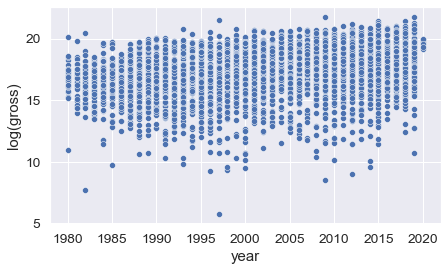

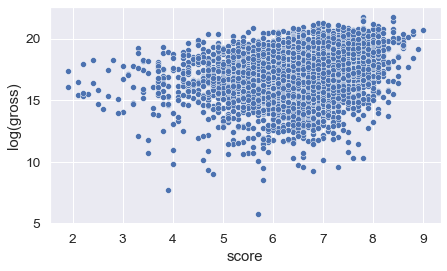

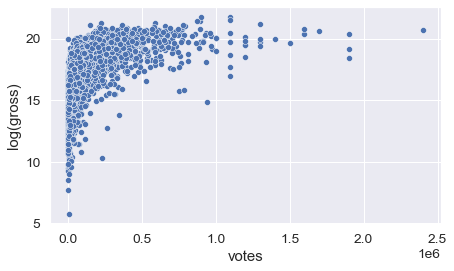

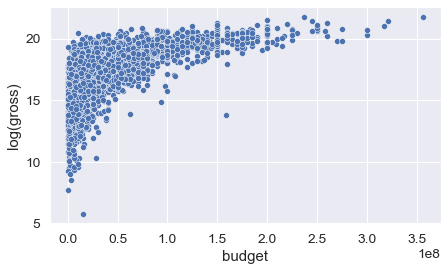

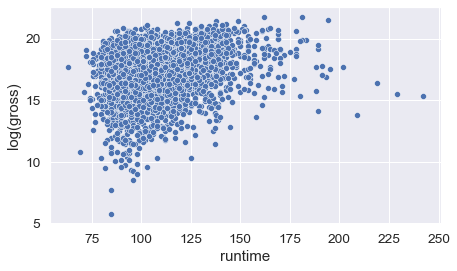

In [34]:
# looking at relationship between the numeric predictors and the TRANSFORMED response to see if any transformation terms need to be added
cols = ['year','score','votes','budget','runtime']
for col in cols:
    plt.rcParams["figure.figsize"] = (7,4)
    sns.set(font_scale=1.25)
    sns.scatterplot(x = col, y = np.log(train.gross), data = train_filtered)
    plt.ylabel('log(gross)')
    plt.show()

In [36]:
# adding quadratic transformation of 'votes' and 'budget' based off the scatterplots
ols_object = smf.ols(formula = 'np.sqrt(gross)~year*votes+year*budget+score*votes+year*runtime+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating+I(votes**2)+I(budget**2)', data = train_filtered)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(gross)   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     586.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:18:25   Log-Likelihood:                -40862.
No. Observations:                4327   AIC:                         8.178e+04
Df Residuals:                    4301   BIC:                         8.194e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0009      0.000     -5.156      0.000      -0.001      -0.001
month[T.August]               0.0014      0.002      0.666      0.506      -0.003       0.006
month[T.December]            -0.0001      0.000     -0.705      0.481      -0.001       0.000
month[T.February]         -2.302e-05      0.000     -0.151      0.880      -0.000       0.000
month[T.January]              0.0001      0.000      0.455      0.649      -0.000       0.001
month[T.July]               9.36e-05   2.54e-05      3.687      0.000    4.38e-05       0.000
month[T.June]              7.119e-06   6.13e-06      1.160      0.246   -4.91e-06    1.91e-05
month[T.March]            -1.773e-05      0.000     -0.085      0.932      -0.000       0.000
month[T.May]               3.748e-05   5.15e-05      0.727      0.467   -6.36e-05       0.000
month[T.November]         -4.087e-05      0.000     -0.195      0.845      -0.000       0.000
month[T.October]           4.519e-05   5.01e-05      0.901      0.367   -5.31e-05       0.000
month[T.September]         7.769e-05   4.63e-05      1.677      0.094   -1.32e-05       0.000
genre[T.Adventure]         5.445e-05   7.99e-05      0.681      0.496      -0.000       0.000
genre[T.Animation]         5.261e-05      0.000      0.365      0.715      -0.000       0.000
genre[T.Biography]        -3.651e-05    3.4e-05     -1.075      0.282      -0.000    3.01e-05
genre[T.Comedy]               0.0003      0.000      1.725      0.085   -3.44e-05       0.001
genre[T.Crime]            -9.392e-05      0.000     -0.423      0.672      -0.001       0.000
genre[T.Drama]               -0.0001      0.000     -1.159      0.247      -0.000       0.000
genre[T.Family]            1.528e-10   2.79e-11      5.471      0.000     9.8e-11    2.08e-10
genre[T.Fantasy]          -2.172e-07    3.2e-05     -0.007      0.995   -6.29e-05    6.24e-05
genre[T.Horror]               0.0002      0.000      1.125      0.261      -0.000       0.000
genre[T.Mystery]            3.39e-06   6.11e-06      0.555      0.579   -8.58e-06    1.54e-05
genre[T.Romance]          -1.478e-06   9.58e-07     -1.542      0.123   -3.36e-06    4.01e-07
genre[T.Sci_Fi]           -6.182e-06   1.87e-05     -0.331      0.741   -4.28e-05    3.05e-05
genre[T.Thriller]          6.508e-06    1.6e-05      0.406      0.685   -2.49e-05    3.79e-05
genre[T.Western]           1.462e-07   5.49e-07      0.267      0.790   -9.29e-07    1.22e-06
rating[T.G]                4.675e-05   7.85e-05      0.596      0.551      -0.000       0.000
rating[T.NC_17]           -3.127e-06   1.26e-05     -0.248      0.804   -2.79e-05    2.16e-05
rating[T.Not_Rated]        1.706e-05   4.94e-05      0.345      0.730   -7.99e-05       0.000
rating[T.PG]                 -0.0001      0.001     -0.161      0.872      

After looking at the residual plot again (below), we saw that we still needed to fix the heteroskedasticity in the plot. As such, we decided to transform the response variable

Text(0, 0.5, 'Residuals')

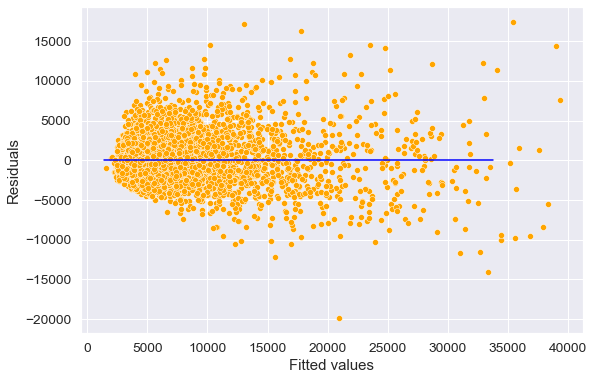

In [37]:
# residual plot to check if heteroskedasticity in model has been fixed - it has!
pred_gross = model.predict(test)
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [pred_gross.min(),pred_gross.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [39]:
# comparing RSE vs RMSE to make sure model is not overfitting - its not!

# RSE on training data
rse = np.sqrt(model.mse_resid)
print(rse**2)
# RMSE
pred_sqrt_gross = model.predict(test)
rmse = np.sqrt(((np.sqrt(test.gross) - (pred_sqrt_gross))**2).mean())
print(rmse**2)

9389740.297069948
9713880.164591804


### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [133]:
ols_object = smf.ols(formula = 'np.sqrt(gross)~year*votes+year*budget+score*votes+year*runtime+score*budget+score*runtime+votes*budget+votes*runtime+month+genre*budget+rating+I(votes**2)+I(budget**2)', data = train_filtered)
model= ols_object.fit()
model.summary()

## Conclusions and Recommendations to stakeholder(s)
*By Artharva Weling*

You may or may not have code to put in this section. Delete this section if it is irrelevant.

In [ ]:
artharva